In [1]:
try:
    from PIL import Image
except ImportError:
    import Image
import pytesseract

pytesseract.pytesseract.tesseract_cmd = r'/usr/local/bin/tesseract'

In [2]:
text_from_image = pytesseract.image_to_string(Image.open('image_facture.png'))
print(text_from_image)

DARTY GRAND OUEST

Cc
Service Comptabilité 2
TSA n° 90 005 2
93145 - Bondy cedex
0 978 970 970 (prix d'un appel local) c
°
g
3
JUSTIFICATIF DE VENTE (valant facture) 8
Le 04/03/2021
Votre commande 9160108143690 du 28/01/2021
Référence Qté Libellé Date
délivrance
3857433 1 MAGIM EXPRESSO M105 INISSIA 01/02/2021
CREME
Disponibilité des pieces détachées : 5 ans
Dont éco-participation DEEE
4593510 1. KCOOK RECHAUD HPV240 01/02/2021

Disponibilité des pieces détachées : 1 an

Dont éco-participation DEEE

Le contrat de confiance. Total facture :

Dont éco-participation DEEE :

M BEYLARD PIERRE

32 SEN DE MARIE GALANTE
33300 BORDEAUX

France

M BEYLARD PIERRE

32 SEN DE MARIE GALANTE
33300 BORDEAUX

France

Montant / Taux
TVA

58,32 € 11,66
20,00 %

Total HT

0,02 € 0,00
20,00 %

77,49 € 15,50
20,00 %

0,06 € 0,01
20,00 %

135,81 €
0,08 €

Page 1/1

 

Total TTC

69,99 €

0,02 €

92,99 €

0,07 €

 

Montant régle par :

Carte Bleue

Solde a régler :

 

DARTY GRAND OUEST - SNC au capital de 3

In [5]:
from pdf2image import convert_from_path

pdfs = r"facture.pdf"

pages = convert_from_path(pdfs, 350, poppler_path = r'/usr/local/Cellar/poppler/21.09.0/bin' )
i = 1
for page in pages:
    image_name = "Page_" + str(i) + ".jpg"  
    page.save(image_name, "JPEG")
    i = i+1

In [6]:
text_from_image = pytesseract.image_to_string(Image.open('Page_1.jpg'))
print(text_from_image)

Page 1/1

DARTY GRAND OUEST

M BEYLARD PIERRE

 

Cc
Service Comptabilité 8 32 SEN DE MARIE GALANTE
TSA n° 90 005 5 33800 BORDEAUX
rance
93145 - Bondy cedex
0 978 970 970 (prix d'un appel local) < | MBEYLARD PIERRE
3 32 SEN DE MARIE GALANTE
3 33300 BORDEAUX
JUSTIFICATIF DE VENTE (valant facture) ® | France
Le 04/03/2021
Votre commande 9160108143690 du 28/01/2021
nee , . ; Date Montant / Taux
Référence Qté Libellé délivrance Total HT TVA Total TTC
3857433 1 MAGIM EXPRESSO M105 INISSIA 01/02/2021 58,32 € 11,66 69,99 €
CREME 20,00 %
Disponibilité des pieces détachées : 5 ans
Dont éco-participation DEEE 0,02 € 0,00 0,02 €
20,00 %
4593510 1 © KCOOK RECHAUD HPV240 01/02/2021 77,49 € 15,50 92,99 €
Disponibilité des pieces détachées : 1 an 20,00 %
Dont éco-participation DEEE 0,06 € 0,01 0,07 €
20,00 %

Le contrat de confiance. Total facturé : 135,81 € 27,16 € 162,98 €

Dont éco-participation DEEE : 0,08 € 0,09 €

 

Montant réglé par : Carte Bleue

Solde a régler :

 

DARTY GRAND OUEST - SNC 

In [11]:
# use this command to install open cv2
# pip install opencv-python

# use this command to install PIL
# pip install Pillow

import cv2
from PIL import Image

def mark_region(image_path):
    
    im = cv2.imread(image_path)

    gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (9,9), 0)
    thresh = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,11,30)

    # Dilate to combine adjacent text contours
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9,9))
    dilate = cv2.dilate(thresh, kernel, iterations=4)

    # Find contours, highlight text areas, and extract ROIs
    cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]

    line_items_coordinates = []
    for c in cnts:
        area = cv2.contourArea(c)
        x,y,w,h = cv2.boundingRect(c)

        if y >= 600 and x <= 1000:
            if area > 10000:
                image = cv2.rectangle(im, (x,y), (2200, y+h), color=(255,0,255), thickness=3)
                line_items_coordinates.append([(x,y), (2200, y+h)])

        if y >= 2400 and x<= 2000:
            image = cv2.rectangle(im, (x,y), (2200, y+h), color=(255,0,255), thickness=3)
            line_items_coordinates.append([(x,y), (2200, y+h)])


    return image, line_items_coordinates

In [16]:
image1, line_coordinate = mark_region("Page_1.jpg")

In [17]:
import matplotlib.pyplot as plt

4593510 1 KCOOK RECHAUD HPV240 01/02/2021 77,49 €
Disponibilité des pieces détachées : 1 an



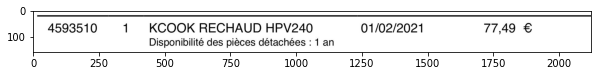

In [21]:
# load the original image
image = cv2.imread('Page_1.jpg')

# get co-ordinates to crop the image
c = line_coordinate[10]

# cropping image img = image[y0:y1, x0:x1]
img = image[c[0][1]:c[1][1], c[0][0]:c[1][0]]    

plt.figure(figsize=(10,10))
plt.imshow(img)

# convert the image to black and white for better OCR
ret,thresh1 = cv2.threshold(img,120,255,cv2.THRESH_BINARY)

# pytesseract image to string to get results
text = str(pytesseract.image_to_string(thresh1, config='--psm 6'))
print(text)


In [25]:
# load the original image
image = cv2.imread('Page_1.jpg')

for i in range(len(line_coordinate)):
    # get co-ordinates to crop the image
    c = line_coordinate[i]

    # cropping image img = image[y0:y1, x0:x1]
    img = image[c[0][1]:c[1][1], c[0][0]:c[1][0]]    

    # convert the image to black and white for better OCR
    ret,thresh1 = cv2.threshold(img,120,255,cv2.THRESH_BINARY)

    # pytesseract image to string to get results
    text = str(pytesseract.image_to_string(thresh1, config='--psm 6'))
    print(text)


DARTY GRAND OUEST - SNC au capital de 30 612 EUR - RCS NANTES B 339 403 §
Adresse : Pare Tertiaire de l'Eraudiére - 32, rue de Coulongé - 44315 NANTES Cedex |
TVA intracommunautaire : FR 95 339 403 933

DARTY GRAND OUEST - SNC au capital de 30 612 EUR - RCS NANTES B 339 403 §
Adresse : Pare Tertiaire de l'Eraudiére - 32, rue de Coulongé - 44315 NANTES Cedex |
TVA intracommunautaire : FR 95 339 403 933

Montant reéglé par : Carte Bleue
Solde a ré

Montant reéglé par : Carte Bleue
Solde a ré

Le contrat de confiance. | Total facturé : 135,81 €

Le contrat de confiance. | Total facturé : 135,81 €

Total facturé : 135,81 €
Dont éco-participation DEEE : 0,08 €

Total facturé : 135,81 €
Dont éco-participation DEEE : 0,08 €


Dont éco-participation DEEE 0,06 €

4593510 1 KCOOK RECHAUD HPV240 01/02/2021 77,49 €
Disponibilité des pieces détachées : 1 an

Dont éco-participation DEEE 0,02 €

. : VAalG WIUOTILATI
Libellé eb Total HT

nee s . s vale WIOTTLATI
Reférence Qte Libellé al T